In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path
import sys
from scipy import stats


In [2]:
# Define the tickers
tickers = ["AXON","BA","GD",
           "NEM","FNV","GOLD",
           "BAC","JPM","BMO",
           "GS", "MS","SCHW",
           "NVO", "REGN", "VRTX",
           "ANET", "DELL", "HP",
           "IAU", "URE", "ELD",
           "SSD", "UFPI", "WFG",
           "BKNG", "TNL","RCL",
           "NVDA","TSM", "AVGO"]

# Store the stock data for the tickers
stocks = yf.download(tickers, start="2018-04-01", end="2023-04-01")
stocks.head()

[*********************100%***********************]  30 of 30 completed


Adj Close                                                \
                 ANET        AVGO       AXON          BA        BAC   
Date                                                                  
2018-04-02  63.377499  189.849335  39.480000  308.799896  26.204853   
2018-04-03  63.377499  197.437332  42.400002  316.825409  26.455187   
2018-04-04  64.739998  197.612411  41.980000  313.588318  26.714462   
2018-04-05  65.684998  197.045410  42.860001  322.169373  27.107851   
2018-04-06  64.680000  190.841583  41.840000  312.324158  26.490952   

                                                                     ...  \
                   BKNG        BMO       DELL        ELD        FNV  ...   
Date                                                                 ...   
2018-04-02  2030.859985  62.606171  19.714382  30.269772  66.150688  ...   
2018-04-03  2067.570068  62.840424  19.785025  30.231134  64.544235  ...   
2018-04-04  2071.010010  62.848763  19.825779  30.207956  64.164001  ...   
2018-04-05  2091.090088  63.693680  19.782307  30.130695  64.278076  ...   
2018-04-06  2033.410034  63.133209  19.369329  30.053425  64.458687  ...   

             Volume                                                      \
                RCL     REGN     SCHW     SSD      TNL      TSM    UFPI   
Date                                                                      
2018-04-02  1228400  1317100  8356400  209900  2561426  6361200  243000   
2018-04-03   875700   815400  7848400  305700  1444845  6174500  223400   
2018-04-04  1057800   857500  7313300  185100  1272075  5497100  186000   
2018-04-05  1918000   848500  6266300  145900  1913317  6115100  414800   
2018-04-06  1106300  1010200  8171400  157000  1604989  5133100  217400   

                                   
              URE     VRTX    WFG  
Date                               
2018-04-02  34900  1804500      0  
2018-04-03  17600  1542300  15300  
2018-04-04  39600  1832000   7100  
2018-04-05  26200  1352800      0  
2018-04-06  60500  1446300    300  

[5 rows x 180 columns]

In [ ]:
#Covert to pandas DataFrame
stocks_df = pd.DataFrame(stocks)

In [ ]:
#Drop all columns not needed for analysis from dataframe 
stocks_df = stocks_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
stocks_df

In [ ]:
#Calculate the daily returns from the closing prices using the pct_change function
stocks_daily_returns = stocks_df.pct_change()
stocks_daily_returns

In [6]:
#Drop null values
stocks_daily_returns.dropna(inplace=True)

In [7]:
stocks_daily_returns

Close                                                    \
                ANET      AVGO      AXON        BA       BAC      BKNG   
Date                                                                     
2018-04-03  0.000000  0.039968  0.073962  0.025989  0.009553  0.018076   
2018-04-04  0.021498  0.000887 -0.009906 -0.010217  0.009801  0.001664   
2018-04-05  0.014597 -0.002869  0.020962  0.027364  0.014726  0.009696   
2018-04-06 -0.015300 -0.031484 -0.023798 -0.030559 -0.022757 -0.027584   
2018-04-09  0.003015  0.025648 -0.012667 -0.011161  0.008100  0.007539   
...              ...       ...       ...       ...       ...       ...   
2023-03-27 -0.005801 -0.014666  0.009281  0.015390  0.049742  0.003593   
2023-03-28 -0.029531 -0.003414 -0.013679  0.021888 -0.012987  0.014675   
2023-03-29 -0.003067  0.001281  0.005705  0.014686  0.019559  0.010471   
2023-03-30 -0.000062  0.013189  0.004012  0.014762 -0.012906  0.014772   
2023-03-31  0.033048  0.012292  0.032843  0.006586  0.010601  0.016342   

                                                    ...                      \
                 BMO      DELL       ELD       FNV  ...       RCL      REGN   
Date                                                ...                       
2018-04-03  0.003741  0.003583 -0.001276 -0.024285  ... -0.005247  0.004961   
2018-04-04  0.000133  0.002060 -0.000767 -0.005891  ...  0.010376  0.015503   
2018-04-05  0.013443 -0.002193 -0.002558  0.001778  ...  0.008301 -0.025967   
2018-04-06 -0.008800 -0.020876 -0.002564  0.002810  ... -0.025378 -0.027329   
2018-04-09  0.009010  0.008557 -0.006427  0.009143  ...  0.002613  0.000282   
...              ...       ...       ...       ...  ...       ...       ...   
2023-03-27  0.014548  0.016319 -0.001878 -0.003739  ... -0.005916  0.000500   
2023-03-28  0.004780  0.008423  0.003386  0.010634  ...  0.022814  0.007996   
2023-03-29  0.018448  0.021143  0.000375 -0.004814  ...  0.036852 -0.009214   
2023-03-30  0.006152  0.018916  0.009745  0.007463  ...  0.008885 -0.009581   
2023-03-31  0.008945  0.008781  0.004826  0.000069  ...  0.008962  0.012532   

                                                                        \
                SCHW       SSD       TNL       TSM      UFPI       URE   
Date                                                                     
2018-04-03  0.014680  0.020743  0.009542  0.023059  0.024778  0.012359   
2018-04-04  0.011730  0.014490  0.011592  0.010580  0.018289  0.022647   
2018-04-05  0.011594  0.011148 -0.000088 -0.014110  0.015830 -0.000346   
2018-04-06 -0.042789 -0.021189 -0.027856 -0.020776 -0.017081 -0.014711   
2018-04-09  0.001996 -0.010032 -0.003809  0.015323 -0.005488 -0.004918   
...              ...       ...       ...       ...       ...       ...   
2023-03-27  0.030041  0.009683  0.000839 -0.022955  0.019004 -0.000386   
2023-03-28 -0.018411 -0.002943  0.017593  0.001654 -0.000900 -0.006186   
2023-03-29  0.025255  0.003809  0.034852  0.021473  0.004634  0.044933   
2023-03-30 -0.049629  0.001233  0.017502 -0.003126 -0.010123  0.025875   
2023-03-31 -0.001715  0.038848  0.021632  0.005948  0.028738  0.043549   

                                
                VRTX       WFG  
Date                            
2018-04-03  0.013115  0.000000  
2018-04-04  0.023743  0.000000  
2018-04-05 -0.027510  0.000000  
2018-04-06 -0.021629  0.088638  
2018-04-09  0.016272 -0.004562  
...              ...       ...  
2023-03-27 -0.018830  0.029565  
2023-03-28  0.015496 -0.015268  
2023-03-29  0.003160 -0.000711  
2023-03-30 -0.006619 -0.003843  
2023-03-31  0.009322  0.018005  

[1259 rows x 30 columns]

In [8]:
#Retrieve summary statistics of the stocks 
stocks_daily_returns.describe()

Close                                                      \
              ANET         AVGO         AXON           BA          BAC   
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean      0.001133     0.001098     0.001921     0.000179     0.000231   
std       0.026727     0.023306     0.033036     0.031949     0.022427   
min      -0.242344    -0.199129    -0.156125    -0.238484    -0.153973   
25%      -0.012149    -0.010538    -0.014164    -0.013414    -0.010431   
50%       0.001359     0.001626     0.002695    -0.000507     0.000324   
75%       0.014586     0.013180     0.018159     0.013566     0.010754   
max       0.203882     0.158337     0.245755     0.243186     0.177962   

                                                                        ...  \
              BKNG          BMO         DELL          ELD          FNV  ...   
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000  ...   
mean      0.000484     0.000298     0.000838    -0.000263     0.000772  ...   
std       0.023352     0.017803     0.024271     0.007824     0.019248  ...   
min      -0.112374    -0.161223    -0.216393    -0.074425    -0.095818  ...   
25%      -0.011111    -0.006785    -0.009660    -0.004058    -0.009986  ...   
50%       0.001032     0.000808     0.001043     0.000000     0.000430  ...   
75%       0.011626     0.007978     0.012538     0.003742     0.011379  ...   
max       0.187521     0.157799     0.144667     0.051156     0.110634  ...   

                                                                        \
               RCL         REGN         SCHW          SSD          TNL   
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean      0.000406     0.000938     0.000322     0.000804     0.000320   
std       0.041442     0.020825     0.024153     0.022960     0.031892   
min      -0.317782    -0.104893    -0.127690    -0.157113    -0.305523   
25%      -0.015660    -0.010798    -0.011631    -0.009399    -0.014362   
50%      -0.000176     0.000500     0.000432     0.001220     0.000000   
75%       0.015104     0.011442     0.012276     0.010996     0.014635   
max       0.287861     0.188468     0.191347     0.216000     0.200303   

                                                                        
               TSM         UFPI          URE         VRTX          WFG  
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000  
mean      0.000869     0.001042     0.000505     0.000779     0.000507  
std       0.022244     0.024796     0.030518     0.020976     0.030183  
min      -0.140341    -0.163127    -0.333919    -0.206955    -0.154286  
25%      -0.011965    -0.011852    -0.012131    -0.009727    -0.014439  
50%       0.000487     0.001743     0.001597     0.000780     0.000000  
75%       0.012542     0.013680     0.014832     0.011409     0.014478  
max       0.126522     0.195874     0.171717     0.151569     0.222286  

[8 rows x 30 columns]

<AxesSubplot:xlabel='Date'>

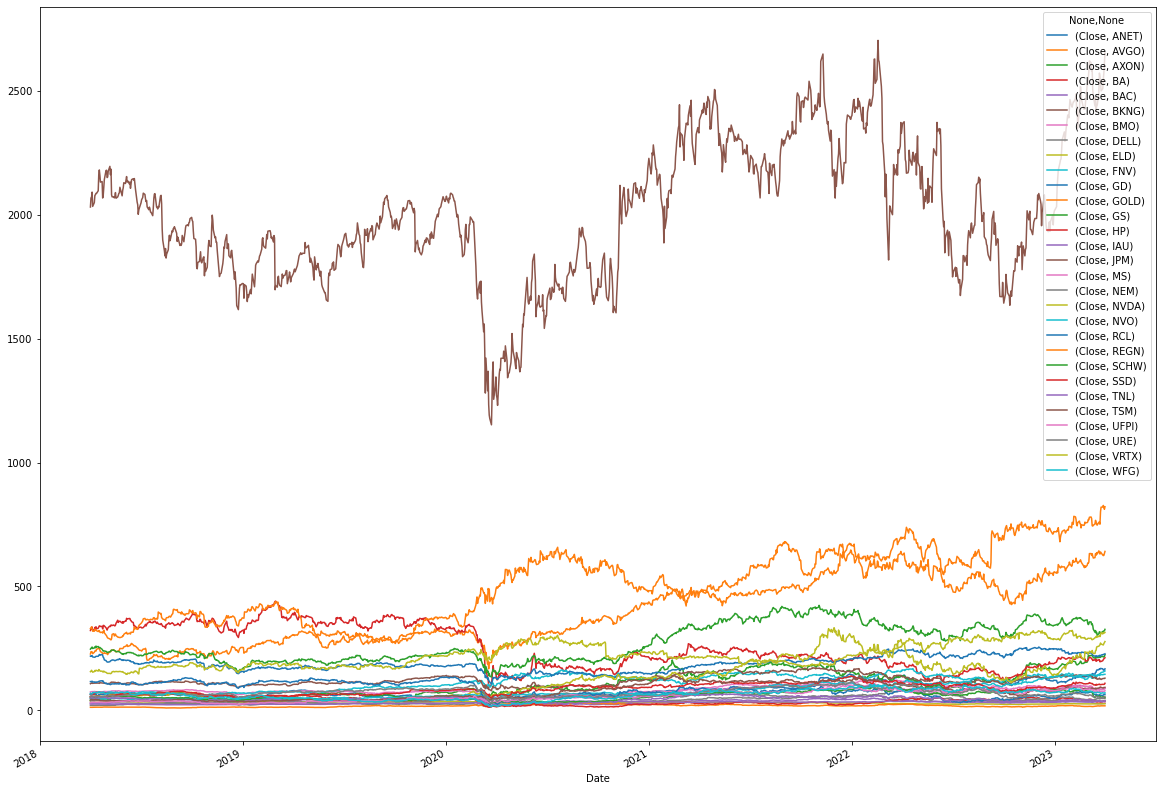

In [9]:
#Plot visual for closing prices of the different stocks 
stocks_df.plot(figsize=(20,15))

<AxesSubplot:xlabel='Date'>

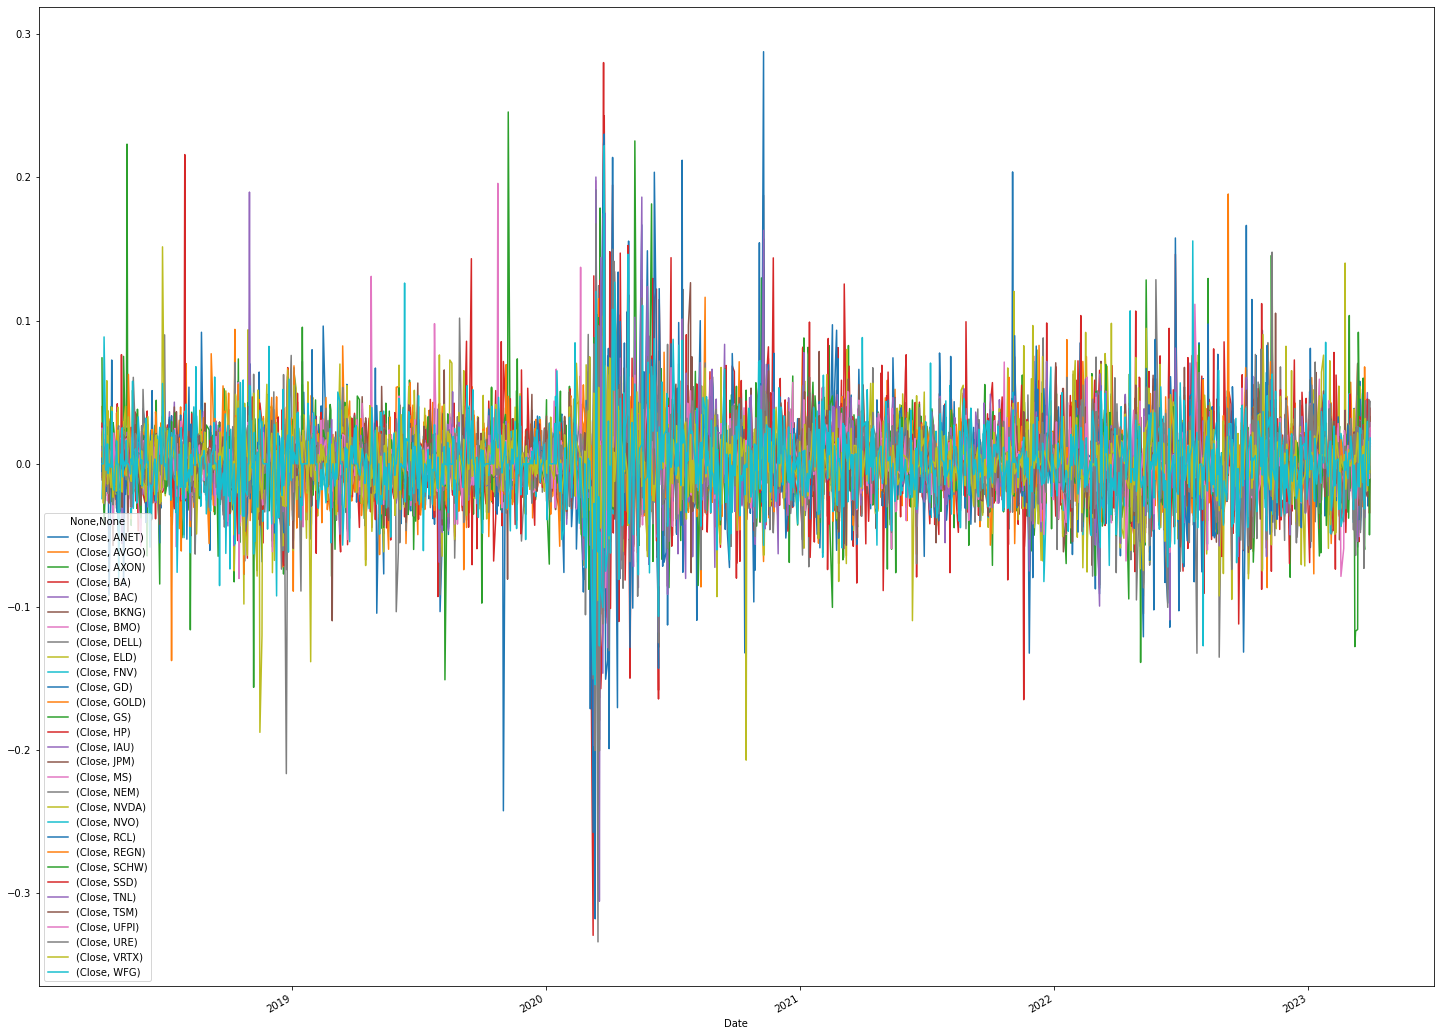

In [10]:
#Plot visual for the daily returns of all stocks 
stocks_daily_returns.plot(figsize=(25,20))

In [11]:
average_returns = stocks_daily_returns.mean()
average_returns

Close  ANET    0.001133
       AVGO    0.001098
       AXON    0.001921
       BA      0.000179
       BAC     0.000231
       BKNG    0.000484
       BMO     0.000298
       DELL    0.000838
       ELD    -0.000263
       FNV     0.000772
       GD      0.000165
       GOLD    0.000575
       GS      0.000439
       HP      0.000257
       IAU     0.000337
       JPM     0.000355
       MS      0.000652
       NEM     0.000406
       NVDA    0.001829
       NVO     0.001088
       RCL     0.000406
       REGN    0.000938
       SCHW    0.000322
       SSD     0.000804
       TNL     0.000320
       TSM     0.000869
       UFPI    0.001042
       URE     0.000505
       VRTX    0.000779
       WFG     0.000507
dtype: float64

<AxesSubplot:>

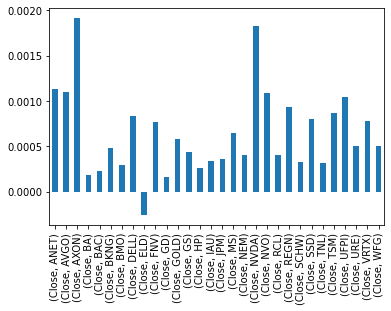

In [12]:
average_returns.plot(kind="bar")

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

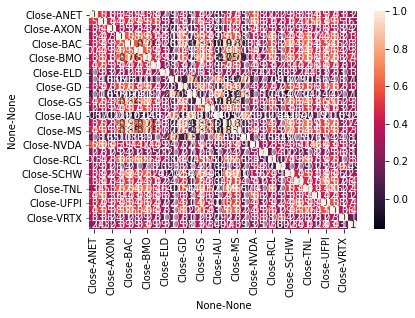

In [13]:
correlation_matrix = stocks_daily_returns.corr()
sns.heatmap(correlation_matrix, annot=True)



In [14]:
#Calculate standard deviation risk metric individually    "Side note: could add a forloop here to loop through the list to compare to the benchmark like in assignment 

std_all_stocks = stocks_daily_returns.std()
std_all_stocks

Close  ANET    0.026727
       AVGO    0.023306
       AXON    0.033036
       BA      0.031949
       BAC     0.022427
       BKNG    0.023352
       BMO     0.017803
       DELL    0.024271
       ELD     0.007824
       FNV     0.019248
       GD      0.016228
       GOLD    0.023234
       GS      0.020834
       HP      0.037848
       IAU     0.009174
       JPM     0.020277
       MS      0.022284
       NEM     0.021468
       NVDA    0.032965
       NVO     0.016817
       RCL     0.041442
       REGN    0.020825
       SCHW    0.024153
       SSD     0.022960
       TNL     0.031892
       TSM     0.022244
       UFPI    0.024796
       URE     0.030518
       VRTX    0.020976
       WFG     0.030183
dtype: float64

<AxesSubplot:xlabel='Date'>

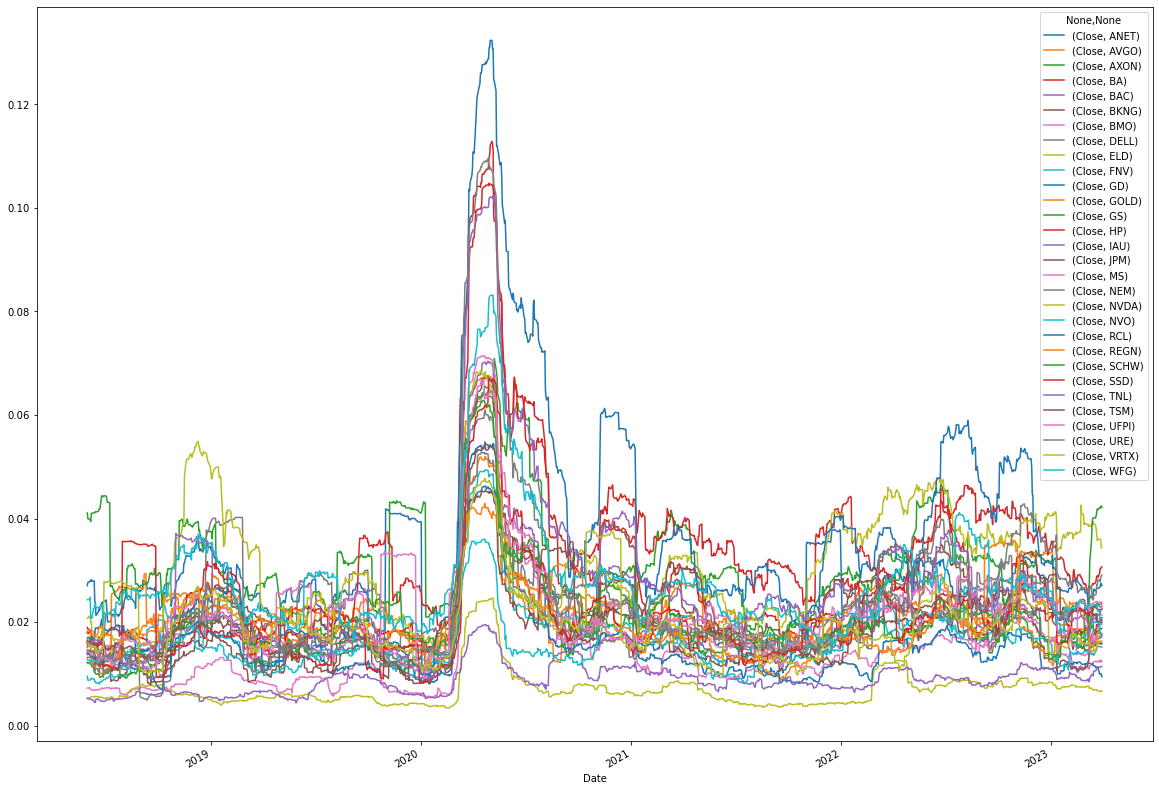

In [15]:
#Calculate and plot the rolling std deviation for all stocks over a 42 day window - risk analysis over time period
rolling_std_all_stocks = stocks_daily_returns.rolling(window=42).std()
rolling_std_all_stocks.plot(figsize=(20,15))



In [16]:
#Value at Risk (VaR): VaR is a statistical measure of the maximum loss that an investment is likely to incur over a given time period with a certain level of 
#confidence.

VaR_stocks = stats.norm.ppf(stocks_daily_returns)
VaR_stocks

array([[       -inf, -1.75105283, -1.44690654, ..., -2.24578405,
        -2.22278995,        -inf],
       [-2.02374585, -3.12569484,         nan, ..., -2.00191701,
        -1.98193363,        -inf],
       [-2.18086113,         nan, -2.03426606, ...,         nan,
                nan,        -inf],
       ...,
       [        nan, -3.01601685, -2.5298854 , ..., -1.69610584,
        -2.73065983,         nan],
       [        nan, -2.22058774, -2.65102986, ..., -1.94520933,
                nan,         nan],
       [-1.83776994, -2.24788134, -1.84055491, ..., -1.71090611,
        -2.35256745, -2.09681303]])

In [17]:
benchmark_ticker = ["^GSPC"]
benchmark_ticker = yf.download(benchmark_ticker, start="2018-04-01", end="2023-04-01")
benchmark_ticker.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,2633.449951,2638.300049,2553.800049,2581.879883,2581.879883,3635780000
2018-04-03,2592.169922,2619.139893,2575.489990,2614.449951,2614.449951,3395840000
2018-04-04,2584.040039,2649.860107,2573.610107,2644.689941,2644.689941,3369230000
2018-04-05,2657.360107,2672.080078,2649.580078,2662.840088,2662.840088,3230430000
2018-04-06,2645.820068,2656.879883,2586.270020,2604.469971,2604.469971,3312390000


In [18]:
benchmark_ticker_df = pd.DataFrame(benchmark_ticker)

In [19]:
benchmark_ticker_df = benchmark_ticker_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
benchmark_ticker_df.head()

,Close
Date,
2018-04-02,2581.879883
2018-04-03,2614.449951
2018-04-04,2644.689941
2018-04-05,2662.840088
2018-04-06,2604.469971


In [20]:
benchmark_returns = benchmark_ticker_df.pct_change()
benchmark_returns

,Close
Date,
2018-04-02,NaN
2018-04-03,0.012615
2018-04-04,0.011566
2018-04-05,0.006863
2018-04-06,-0.021920
...,...
2023-03-27,0.001647
2023-03-28,-0.001574
2023-03-29,0.014237


In [21]:
benchmark_returns.dropna(inplace=True)

In [22]:
benchmark_returns.columns = ["GSPC"]
benchmark_returns

,GSPC
Date,
2018-04-03,0.012615
2018-04-04,0.011566
2018-04-05,0.006863
2018-04-06,-0.021920
2018-04-09,0.003337
...,...
2023-03-27,0.001647
2023-03-28,-0.001574
2023-03-29,0.014237


In [23]:
combined_returns_df = pd.concat([stocks_daily_returns, benchmark_returns], axis="columns", join="inner")
combined_returns_df

,"(Close, ANET)","(Close, AVGO)","(Close, AXON)","(Close, BA)","(Close, BAC)","(Close, BKNG)","(Close, BMO)","(Close, DELL)","(Close, ELD)","(Close, FNV)",...,"(Close, REGN)","(Close, SCHW)","(Close, SSD)","(Close, TNL)","(Close, TSM)","(Close, UFPI)","(Close, URE)","(Close, VRTX)","(Close, WFG)",GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-03,0.000000,0.039968,0.073962,0.025989,0.009553,0.018076,0.003741,0.003583,-0.001276,-0.024285,...,0.004961,0.014680,0.020743,0.009542,0.023059,0.024778,0.012359,0.013115,0.000000,0.012615
2018-04-04,0.021498,0.000887,-0.009906,-0.010217,0.009801,0.001664,0.000133,0.002060,-0.000767,-0.005891,...,0.015503,0.011730,0.014490,0.011592,0.010580,0.018289,0.022647,0.023743,0.000000,0.011566
2018-04-05,0.014597,-0.002869,0.020962,0.027364,0.014726,0.009696,0.013443,-0.002193,-0.002558,0.001778,...,-0.025967,0.011594,0.011148,-0.000088,-0.014110,0.015830,-0.000346,-0.027510,0.000000,0.006863
2018-04-06,-0.015300,-0.031484,-0.023798,-0.030559,-0.022757,-0.027584,-0.008800,-0.020876,-0.002564,0.002810,...,-0.027329,-0.042789,-0.021189,-0.027856,-0.020776,-0.017081,-0.014711,-0.021629,0.088638,-0.021920
2018-04-09,0.003015,0.025648,-0.012667,-0.011161,0.008100,0.007539,0.009010,0.008557,-0.006427,0.009143,...,0.000282,0.001996,-0.010032,-0.003809,0.015323,-0.005488,-0.004918,0.016272,-0.004562,0.003337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,-0.005801,-0.014666,0.009281,0.015390,0.049742,0.003593,0.014548,0.016319,-0.001878,-0.003739,...,0.000500,0.030041,0.009683,0.000839,-0.022955,0.019004,-0.000386,-0.018830,0.029565,0.001647
2023-03-28,-0.029531,-0.003414,-0.013679,0.021888,-0.012987,0.014675,0.004780,0.008423,0.003386,0.010634,...,0.007996,-0.018411,-0.002943,0.017593,0.001654,-0.000900,-0.006186,0.015496,-0.015268,-0.001574
2023-03-29,-0.003067,0.001281,0.005705,0.014686,0.019559,0.010471,0.018448,0.021143,0.000375,-0.004814,...,-0.009214,0.025255,0.003809,0.034852,0.021473,0.004634,0.044933,0.003160,-0.000711,0.014237


<AxesSubplot:xlabel='Date'>

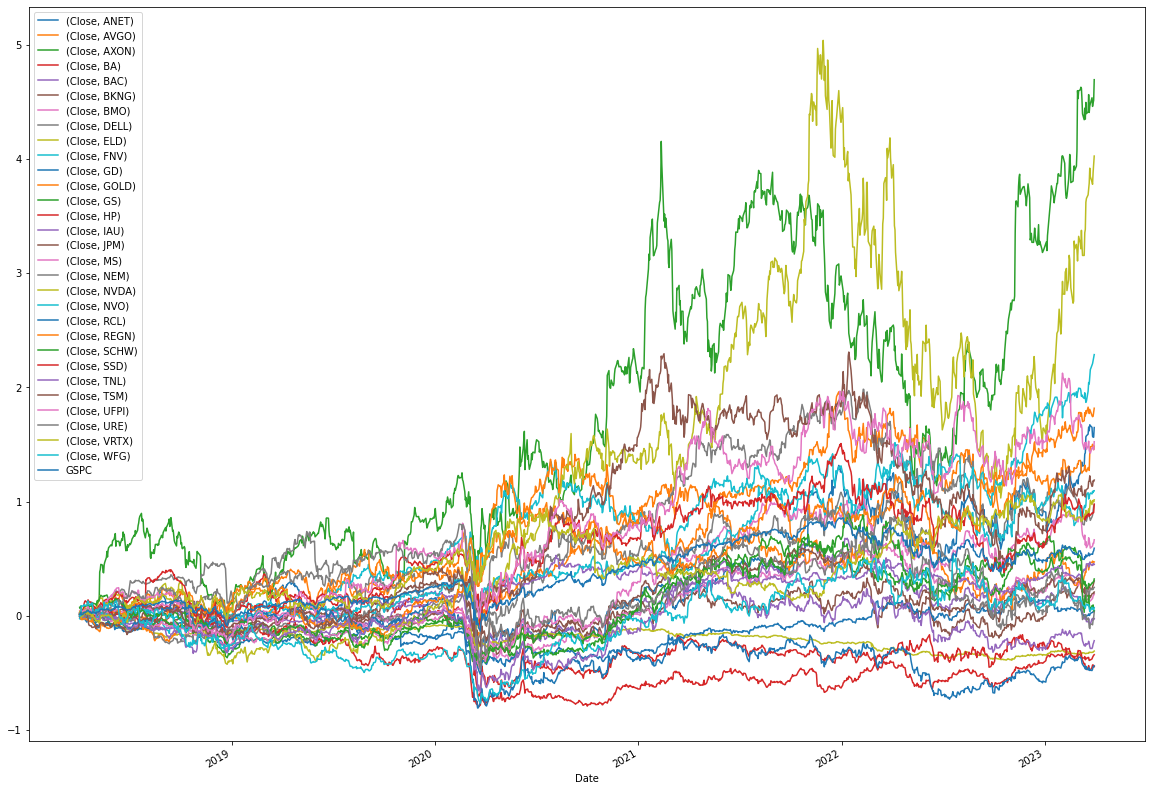

In [24]:
#Calculate cumulative returns of all assets 
cumulative_returns = (1 + combined_returns_df).cumprod() - 1

#Plot the cumulative returns 
cumulative_returns.plot(figsize=(20,15))

In [25]:
index_symbol = "GSPC"


In [26]:
#Calculate the beta for all stocks vs the benchmark - S&P 500
#Create an empty dataframe to store the beta values 
betas_df = pd.DataFrame(columns=["Symbol", "Beta"])

In [27]:
#Loop through stocks and calculate the beta for each stock vs the index 
for symbol in stocks_daily_returns[["Symbol"]].values:
    #Extract stocks and index returns from the different dataframes 
    stock_returns = stocks_daily_returns.loc[stocks_daily_returns["Symbol"] == symbol, "Stock_Returns"]
    index_returns = index_returns.loc[index_returns["Symbol"] == symbol, "Index_Returns"]
    
    #Calculate the covariance and variance of the returns 
    covariance = np.cov(stock_returns, index_returns)[0][1]
    variance = np.var(index_returns)
    
    #Calculate the beta
    beta = covariance / variance
    
    #Append the beta values to the beta list dataframe 
    betas_df = betas_df.append({"Symbol": symbol, "Beta": beta}, ignore_index=True)

print(betas_df)

KeyError: "['Symbol'] not in index"

In [ ]:
#Calculate the annualized sharpe ratios of all assets 
annualized_sharpe_ratios = ((combined_returns_df.mean()) * 252) / (combined_returns_df.std() * np.sqrt(252))
annualized_sharpe_ratios